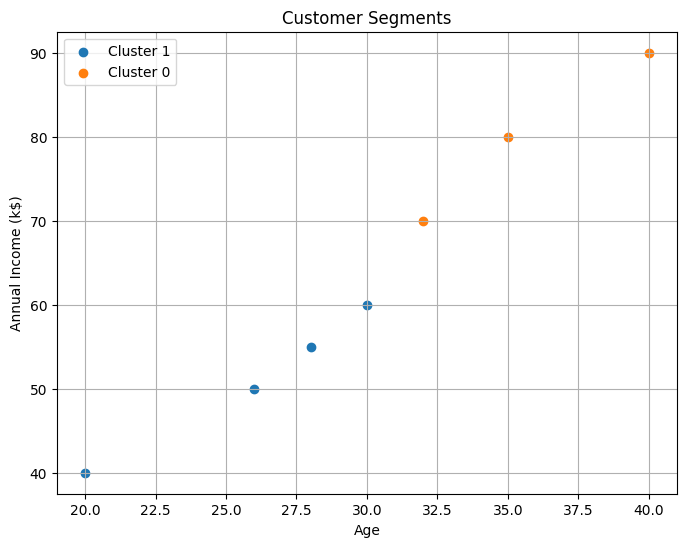

  Customer  Age  Annual Income (k$)  Cluster
0     Riya   20                  40        1
1   Suresh   30                  60        1
2    Priya   26                  50        1
3   Vikram   35                  80        0
4   Ananya   32                  70        0
5    Karan   28                  55        1
6    Meera   40                  90        0


In [4]:
# K-mean Clustering: grouping data into clusters based on similarity.
import pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans  

# Sample data:
data = {
    'Customer': ['Riya', 'Suresh', 'Priya', 'Vikram', 'Ananya', 'Karan', 'Meera'],
    'Age': [20, 30, 26, 35, 32, 28, 40],
    'Annual Income (k$)': [40, 60, 50, 80, 70, 55, 90],
}  
df = pandas.DataFrame(data) 
# Selecting features for clustering:
X = df[['Age', 'Annual Income (k$)']].values # K-Means works with numerical data, so we select the 'Age' and 'Annual Income (k$)' columns for clustering. We convert it to a NumPy array using .values for compatibility with the KMeans algorithm.
# Applying K-Means:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10) # n_init is the number of times the algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
df['Cluster'] = kmeans.fit_predict(X) # The fit_predict method computes cluster centers and predicts the cluster index for each sample. It assigns a cluster label to each data point based on the nearest cluster center.

# Visualizing the clusters:
plt.figure(figsize=(8, 6))
for group in df['Cluster'].unique(): #.unique() returns the unique cluster labels in the 'Cluster' column. We iterate over these unique labels to plot each cluster separately.
    cluster_data = df[df['Cluster'] == group] # We filter the DataFrame to get the data points that belong to the current cluster (group). This creates a subset of the original DataFrame containing only the rows where the 'Cluster' column matches the current group label.
    plt.scatter(cluster_data['Age'], cluster_data['Annual Income (k$)'], label=f'Cluster {group}') # We create a scatter plot for the current cluster using the 'Age' and 'Annual Income (k$)' columns. The label parameter is set to indicate which cluster is being plotted, which will be used in the legend.
    
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Customer Segments')
plt.legend()
plt.grid()
plt.show()
print(df)